# NBA Player Performance Analysis (2024-25 Season)
**Author:** Jericho Layos  
**Date:** January 2026  
**Data Source:** NBA Stats API (`nba_api`)

## Project Objective
The goal of this project is to analyze player efficiency and usage rates in the modern NBA. We will answer:
1. Who are the most efficient high-volume scorers?
2. How does age correlate with key performance metrics?
3. What distinguishes "Superstars" from "Role Players" statistically?

---

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import leaguedashplayerstats 

In [4]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [12,8]
print('Setup Complete')

Setup Complete


## 1. Data Acquisition
We are fetching live data from the **NBA Stats API** for the **2024-25 Regular Season**. 
* **General Stats:** Points, Rebounds, Assists, Minutes.
* **Advanced Stats:** True Shooting % (TS%), Usage % (USG%), Offensive Rating.

In [6]:
print("Fetching General Stats...")

general_stats = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2024-25',
    measure_type_detailed_defense='Base'
).get_data_frames()[0]

Fetching General Stats...


In [9]:
print('Fetching Advanced Stats...')

advanced_stats = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2024-25',
    measure_type_detailed_defense='Advanced'
).get_data_frames()[0]

Fetching Advanced Stats...


In [10]:
df = pd.merge(general_stats, advanced_stats[['PLAYER_ID', 'TS_PCT', 'USG_PCT', 'OFF_RATING', 'DEF_RATING']], on='PLAYER_ID', how='left')

In [13]:
pd.set_option('display.max_columns', None)
df.head()


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT,TS_PCT,USG_PCT,OFF_RATING,DEF_RATING
0,1630639,A.J. Lawson,A.J.,1610612761,TOR,24.0,26,14,12,0.538,486.410000,80,190,0.421,33,101,0.327,43,63,0.683,20,66,86,31,15,13,6,12,44,38,236,-17,427.7,2,0,424.0,424,364,146,239,379,352,340,388,282,281,319,281,267,419,364,359,368,397,414,397,383,241,200,327,337,299,375,159,44,364,1,0.542,0.189,109.7,111.1
1,1631260,AJ Green,AJ,1610612749,MIL,25.0,73,44,29,0.603,1659.141667,182,424,0.429,155,363,0.427,22,27,0.815,18,156,174,108,40,37,7,3,157,50,541,227,1003.8,0,0,1066.0,86,62,362,164,152,231,220,353,58,77,37,364,372,180,381,227,261,215,286,235,370,99,498,290,214,62,247,281,44,225,1,0.621,0.123,114.0,107.6
2,1642358,AJ Johnson,AJ,1610612764,WAS,20.0,29,8,21,0.276,638.386667,82,213,0.385,24,90,0.267,32,37,0.865,8,51,59,76,35,12,3,18,50,27,220,-152,414.8,0,0,409.0,412,445,253,473,338,348,325,472,319,294,425,312,335,87,455,386,410,281,313,406,441,312,217,369,347,495,379,281,44,372,2,0.480,0.173,104.1,115.6
3,203932,Aaron Gordon,Aaron,1610612743,DEN,29.0,51,33,18,0.647,1446.716667,264,497,0.531,75,172,0.436,145,179,0.810,80,167,247,164,73,23,14,37,82,137,748,301,1328.4,3,0,1308.0,275,166,211,101,185,150,182,79,191,222,24,89,93,196,104,206,173,128,180,329,265,451,301,107,139,41,183,134,44,181,1,0.650,0.186,122.5,113.0
4,1628988,Aaron Holiday,Aaron,1610612745,HOU,28.0,62,39,23,0.629,792.246667,117,268,0.437,72,181,0.398,34,41,0.829,13,65,78,83,37,19,11,11,64,49,340,88,611.1,0,0,633.0,192,100,283,124,305,304,297,325,197,216,91,300,321,142,419,361,377,259,303,353,311,224,259,292,292,115,322,281,44,315,1,0.594,0.162,110.3,103.6


In [16]:
df.isnull().sum()

PLAYER_ID            0
PLAYER_NAME          0
NICKNAME             0
TEAM_ID              0
TEAM_ABBREVIATION    0
                    ..
TEAM_COUNT           0
TS_PCT               0
USG_PCT              0
OFF_RATING           0
DEF_RATING           0
Length: 71, dtype: int64

## 2. Data Cleaning & Preprocessing
To ensure our analysis is statistically significant, we apply the following filters:
* **Minimum Games Played:** We remove players with fewer than **20 games**. This eliminates "garbage time" outliers (e.g., a rookie who played 2 minutes and scored 100% shooting).

In [17]:
df_filtered = df[df['GP'] > 20]

In [51]:
df_filtered['PPG'] = (df_filtered['PTS'] / df_filtered['GP']).round(1)
df_filtered['RPG'] = (df_filtered['REB'] / df_filtered['GP']).round(1)
df_filtered['APG'] = (df_filtered['AST'] / df_filtered['GP']).round(1)
df_filtered['FGA'] = (df_filtered['FGA'] / df_filtered['GP']).round(1)

In [43]:
df_filtered = df_filtered.rename(columns={
    'PLAYER_NAME': 'Player',
    'TEAM_ABBREVIATION': 'Team'
})

In [54]:
df.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT,TS_PCT,USG_PCT,OFF_RATING,DEF_RATING,PPG,RPG,APG
0,1630639,A.J. Lawson,A.J.,1610612761,TOR,24.0,26,14,12,0.538,486.410000,80,190,0.421,33,101,0.327,43,63,0.683,20,66,86,31,15,13,6,12,44,38,236,-17,427.7,2,0,424.0,424,364,146,239,379,352,340,388,282,281,319,281,267,419,364,359,368,397,414,397,383,241,200,327,337,299,375,159,44,364,1,0.542,0.189,109.7,111.1,9.1,3.3,1.2
1,1631260,AJ Green,AJ,1610612749,MIL,25.0,73,44,29,0.603,1659.141667,182,424,0.429,155,363,0.427,22,27,0.815,18,156,174,108,40,37,7,3,157,50,541,227,1003.8,0,0,1066.0,86,62,362,164,152,231,220,353,58,77,37,364,372,180,381,227,261,215,286,235,370,99,498,290,214,62,247,281,44,225,1,0.621,0.123,114.0,107.6,7.4,2.4,1.5
2,1642358,AJ Johnson,AJ,1610612764,WAS,20.0,29,8,21,0.276,638.386667,82,213,0.385,24,90,0.267,32,37,0.865,8,51,59,76,35,12,3,18,50,27,220,-152,414.8,0,0,409.0,412,445,253,473,338,348,325,472,319,294,425,312,335,87,455,386,410,281,313,406,441,312,217,369,347,495,379,281,44,372,2,0.480,0.173,104.1,115.6,7.6,2.0,2.6
3,203932,Aaron Gordon,Aaron,1610612743,DEN,29.0,51,33,18,0.647,1446.716667,264,497,0.531,75,172,0.436,145,179,0.810,80,167,247,164,73,23,14,37,82,137,748,301,1328.4,3,0,1308.0,275,166,211,101,185,150,182,79,191,222,24,89,93,196,104,206,173,128,180,329,265,451,301,107,139,41,183,134,44,181,1,0.650,0.186,122.5,113.0,14.7,4.8,3.2
4,1628988,Aaron Holiday,Aaron,1610612745,HOU,28.0,62,39,23,0.629,792.246667,117,268,0.437,72,181,0.398,34,41,0.829,13,65,78,83,37,19,11,11,64,49,340,88,611.1,0,0,633.0,192,100,283,124,305,304,297,325,197,216,91,300,321,142,419,361,377,259,303,353,311,224,259,292,292,115,322,281,44,315,1,0.594,0.162,110.3,103.6,5.5,1.3,1.3


In [45]:
print(f'Original Player Count: {len(df)}')
print(f'Filtered Player Counts: {len(df_filtered)}')

Original Player Count: 569
Filtered Player Counts: 447


## Exploratory Data Analysis

> **Key Observation:** > The list above highlights the league's elite scorers. Notice the relationship between `PPG` and `TS_PCT`. Players maintaining >30 PPG with >60% True Shooting (like Shai Gilgeous-Alexander or Giannis) are historically efficient.

In [47]:
top_scorers = df_filtered.sort_values(by='PPG', ascending=False).head(10)
print('Top 10 Scorers (2024-2025):')
print(top_scorers[['Player', 'Team', 'PPG', 'TS_PCT']])

Top 10 Scorers (2024-2025):
                      Player Team   PPG  TS_PCT
490  Shai Gilgeous-Alexander  OKC  32.7   0.637
180    Giannis Antetokounmpo  MIL  30.4   0.625
423             Nikola Jokić  DEN  29.6   0.663
366              Luka Dončić  LAL  28.2   0.587
29           Anthony Edwards  MIN  27.6   0.595
263             Jayson Tatum  BOS  26.8   0.582
330             Kevin Durant  PHX  26.6   0.642
545             Tyrese Maxey  PHI  26.3   0.562
69           Cade Cunningham  DET  26.1   0.565
226            Jalen Brunson  NYK  26.0   0.605


### Filtering the Most Efficient High-Volume Scorers

In [71]:
efficient_stars = df_filtered[df_filtered['FGA']> 15].sort_values(by='TS_PCT', ascending=False).head(10)
print("\nMost Efficient High-Volume Scorers (TS%):")
print(efficient_stars[['Player', 'Team', 'PPG', 'TS_PCT', 'USG_PCT']])


Most Efficient High-Volume Scorers (TS%):
                      Player Team   PPG  TS_PCT  USG_PCT
423             Nikola Jokić  DEN  29.6   0.663    0.285
330             Kevin Durant  PHX  26.6   0.642    0.283
564              Zach LaVine  SAC  23.3   0.639    0.251
490  Shai Gilgeous-Alexander  OKC  32.7   0.637    0.336
314       Karl-Anthony Towns  NYK  24.4   0.630    0.265
180    Giannis Antetokounmpo  MIL  30.4   0.625    0.346
112           Damian Lillard  MIL  24.9   0.621    0.269
498            Stephen Curry  GSW  24.5   0.618    0.286
427            Norman Powell  LAC  21.8   0.615    0.255
540              Tyler Herro  MIA  23.9   0.605    0.271


In [57]:
correlation_cols = ['AGE', 'PPG', 'RPG', 'APG', 'TS_PCT', 'USG_PCT']
corr_matrix = df_filtered[correlation_cols].corr()

### 3. Correlation Analysis: Age vs. Performance
We analyze how player attributes correlate. A value close to **1.0** means a strong positive relationship (e.g., Minutes vs. Points), while **-1.0** means an inverse relationship.

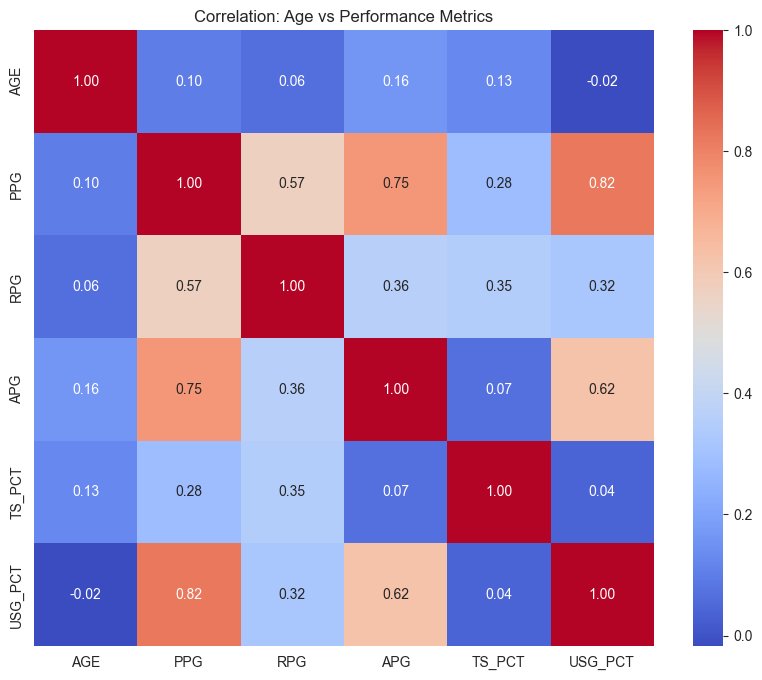

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Age vs Performance Metrics")
plt.show()

> **Heatmap Insight:** > * **Usage & Points:** As expected, there is a very strong correlation between Usage % and PPG. You cannot score if you don't hold the ball.
> * **Age Factor:** Check the correlation between `AGE` and `OFF_RATING`. In the modern NBA, prime efficiency often peaks between ages 26-29.

## 4. Visualizing Roles: Efficiency vs. Usage
This scatter plot groups players into four distinct quadrants:
1.  **Top Right (MVP Candidates):** High Usage, High Efficiency.
2.  **Top Left (Efficient Role Players):** Low Usage, High Efficiency (3&D specialists).
3.  **Bottom Right (Inefficient Volume):** High Usage, Low Efficiency ("Chuckers").
4.  **Bottom Left (Bench/Development):** Low Usage, Low Efficiency.

In [ ]:
plt.figure(figsize=(12, 8))

<Axes: xlabel='USG_PCT', ylabel='TS_PCT'>

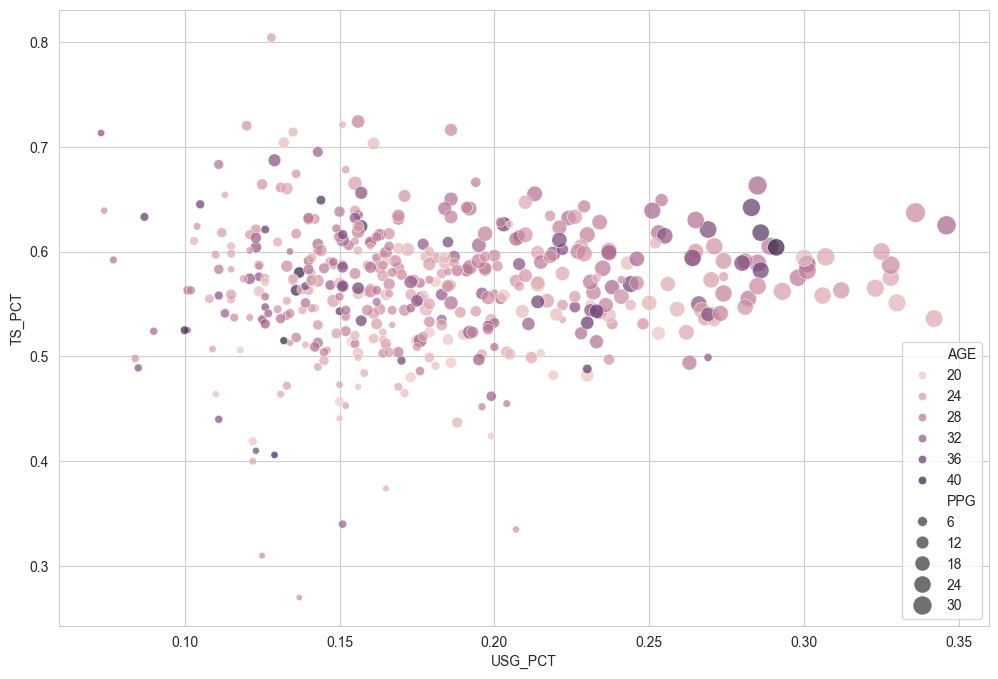

In [63]:
sns.scatterplot(data=df_filtered, x='USG_PCT', y='TS_PCT', hue='AGE', size='PPG', sizes=(20, 200), alpha=0.7)

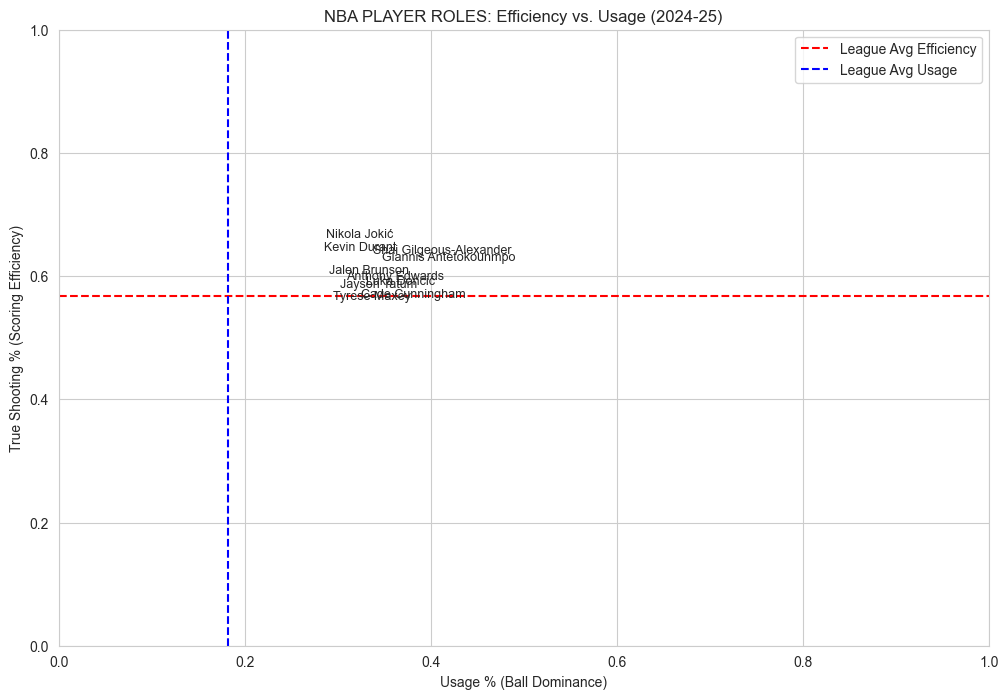

In [65]:
for i in range(len(top_scorers)):
    plt.text(
        top_scorers.iloc[i]['USG_PCT'] + 0.002,
        top_scorers.iloc[i]['TS_PCT'],
        top_scorers.iloc[i]['Player'],
        fontsize=9
    )

plt.title('NBA PLAYER ROLES: Efficiency vs. Usage (2024-25)')
plt.xlabel('Usage % (Ball Dominance)')
plt.ylabel('True Shooting % (Scoring Efficiency)')
plt.axhline(y=df_filtered['TS_PCT'].mean(), color='red', linestyle='--', label='League Avg Efficiency')
plt.axvline(x=df_filtered['USG_PCT'].mean(), color='blue', linestyle='--', label='League Avg Usage')
plt.legend()
plt.show()

In [67]:
df_filtered['3P_Rate'] = df_filtered['FG3A'] / df_filtered['FGA']

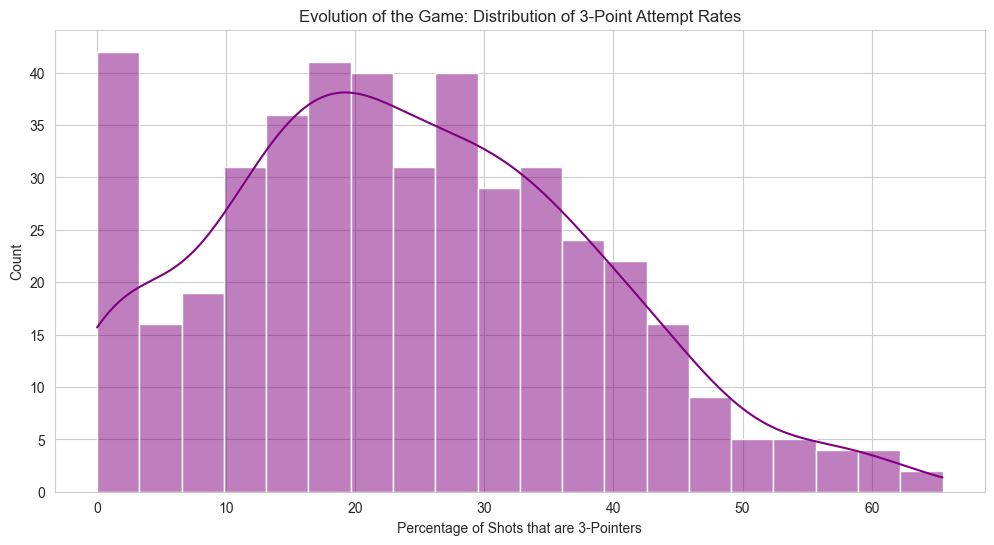

In [69]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_filtered, x='3P_Rate', kde=True, bins=20, color='purple')
plt.title('Evolution of the Game: Distribution of 3-Point Attempt Rates')
plt.xlabel('Percentage of Shots that are 3-Pointers')
plt.show()

## 5. Conclusion
This analysis of the 2024-25 season highlights the premium placed on **efficiency**. 
* The gap between "All-Stars" and "Role Players" is often defined not just by points per game, but by the ability to maintain a **True Shooting % above 60%** while carrying a **Usage Rate > 25%**.
* Future work could involve clustering these players using K-Means to mathematically define player archetypes.